# Import Library 

In [302]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from datasets import load_dataset

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Scikit-Learn ML Libraries :

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Boosting Algorithm Libraries :

from sklearn.ensemble                 import RandomForestClassifier, VotingClassifier
from sklearn.metrics                  import accuracy_score
from sklearn.model_selection          import StratifiedKFold,KFold, train_test_split
from sklearn.linear_model import LogisticRegression

from xgboost import XGBRegressor

import pylab 
import scipy.stats as stats

from sklearn.base import clone
import pickle


# 1. Load Dataset

In [185]:
# Load the dataset
# Note: Ensure you have the 'datasets' library installed and the dataset is available in the Hugging Face hub.
ds = load_dataset("We-Bears/Individual-Carbon-Footprint-Calculation")

In [186]:
ds = ds["train"].to_pandas()

In [187]:
ds.to_csv("carbon_dataset.csv", index=False)

In [188]:
ds.head(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,None,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [189]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

Only Vechicle Type is Null 

In [190]:
ds.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [191]:
tar_col = "CarbonEmission"
num_cols = ds.select_dtypes(include = 'number').columns.tolist()
cat_cols = ds.select_dtypes(exclude = 'number').columns.tolist()

tar_col, num_cols, cat_cols

('CarbonEmission',
 ['Monthly Grocery Bill',
  'Vehicle Monthly Distance Km',
  'Waste Bag Weekly Count',
  'How Long TV PC Daily Hour',
  'How Many New Clothes Monthly',
  'How Long Internet Daily Hour',
  'CarbonEmission'],
 ['Body Type',
  'Sex',
  'Diet',
  'How Often Shower',
  'Heating Energy Source',
  'Transport',
  'Vehicle Type',
  'Social Activity',
  'Frequency of Traveling by Air',
  'Waste Bag Size',
  'Energy efficiency',
  'Recycling',
  'Cooking_With'])

# 2.EDA

## 2.1 Analyze Target

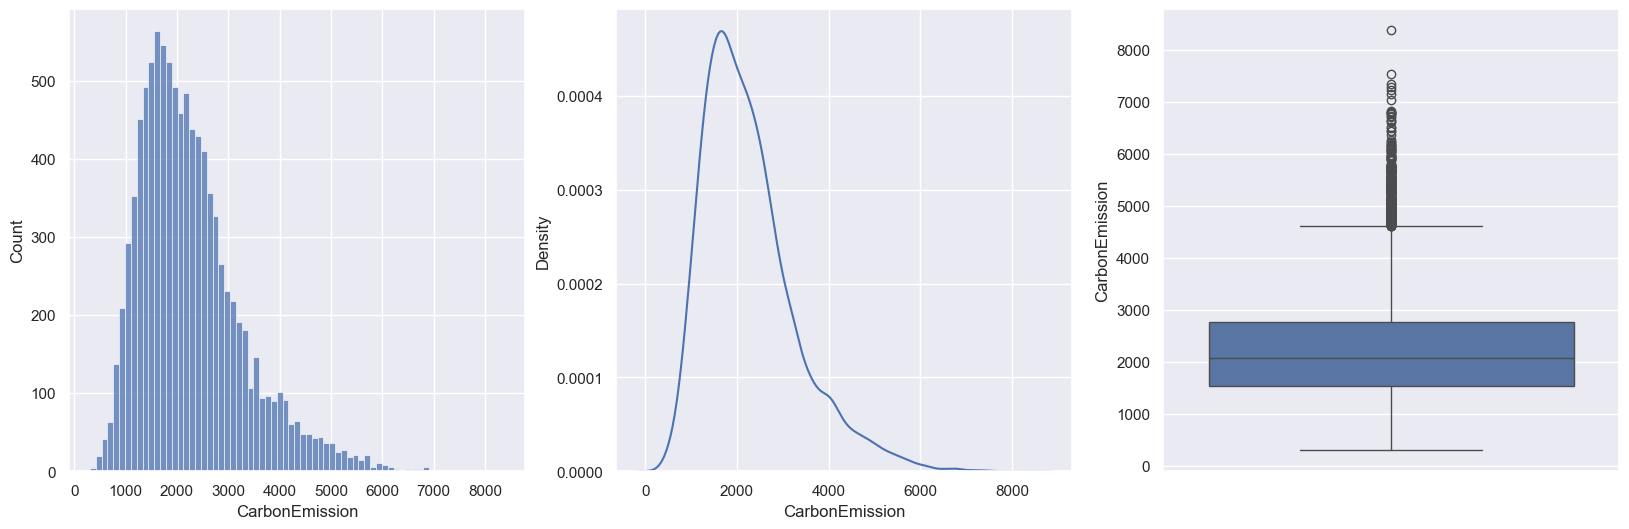

In [192]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
sns.histplot(ds[tar_col],ax = axes[0])
sns.kdeplot(ds[tar_col],ax = axes[1])
sns.boxplot(ds[tar_col],ax = axes[2])
plt.show()

## 2.2 Cat Cols

### 2.2.1 Univarite Analysis - Basic

In [193]:
# Unique values in categorical columns 
cat_stats = []
for c in cat_cols:
    cat_stats.append([c, ds[c].dtype, ds[c].nunique(),ds[c].unique().tolist()])
cat_stats = pd.DataFrame(cat_stats, columns=['Cat-col', 'dtype', 'num_unique_value', 'values'])
cat_stats


,Cat-col,dtype,num_unique_value,values
0,Body Type,object,4,"[overweight, obese, underweight, normal]"
1,Sex,object,2,"[female, male]"
2,Diet,object,4,"[pescatarian, vegetarian, omnivore, vegan]"
3,How Often Shower,object,4,"[daily, less frequently, more frequently, twic..."
4,Heating Energy Source,object,4,"[coal, natural gas, wood, electricity]"
5,Transport,object,3,"[public, walk/bicycle, private]"
6,Vehicle Type,object,5,"[None, petrol, diesel, hybrid, lpg, electric]"
7,Social Activity,object,3,"[often, never, sometimes]"
8,Frequency of Traveling by Air,object,4,"[frequently, rarely, never, very frequently]"
9,Waste Bag Size,object,4,"[large, extra large, small, medium]"


In [194]:
ds.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

### 2.2.2 Multivariate Analysis 

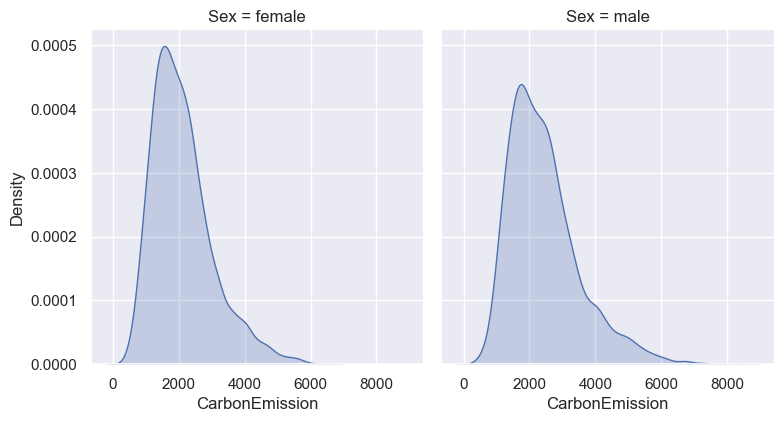

In [195]:
g = sns.FacetGrid(ds, col='Sex', col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, tar_col, fill=True)
plt.subplots_adjust(top=1)

#### 2.2.2.1 Transport

In [196]:
palette = {'public': 'royalblue', 'walk/bicycle': 'limegreen', 'private': 'tomato'}

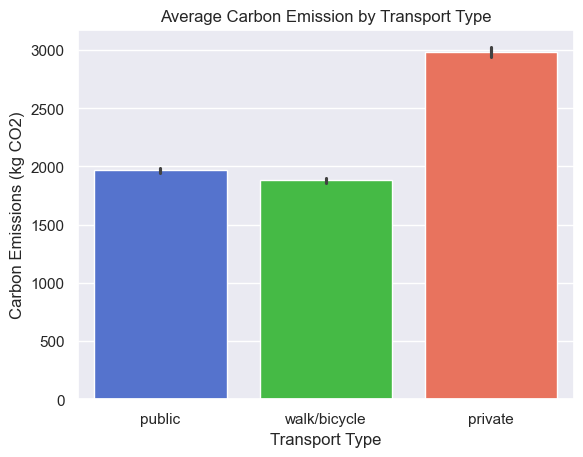

In [197]:
sns.barplot(x='Transport', y='CarbonEmission', data=ds, estimator='mean',palette=palette, hue='Transport')
plt.title("Average Carbon Emission by Transport Type")
plt.ylabel("Carbon Emissions (kg CO2)")
plt.xlabel("Transport Type")
plt.show()

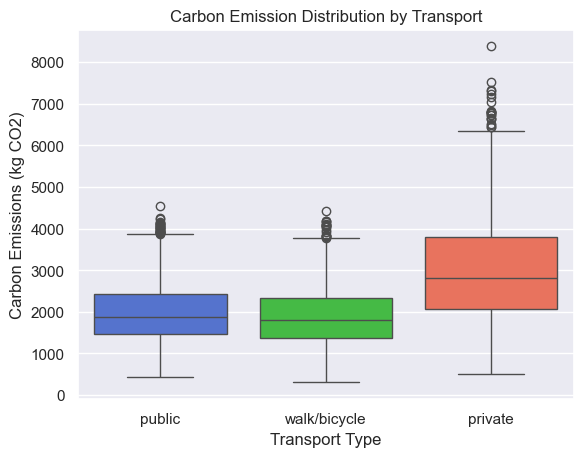

In [198]:
sns.boxplot(x='Transport', y='CarbonEmission', data=ds, palette=palette, hue='Transport')
plt.title("Carbon Emission Distribution by Transport")
plt.ylabel("Carbon Emissions (kg CO2)")
plt.xlabel("Transport Type")
plt.show()

#### 2.2.2.1 Waste Bag 

## 2.3 Num Cols

In [199]:
num_cols = [c for c in num_cols if c not in [tar_col]]
num_cols

['Monthly Grocery Bill',
 'Vehicle Monthly Distance Km',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour']

In [200]:
ds[num_cols].describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000


<Axes: xlabel='Vehicle Monthly Distance Km', ylabel='Count'>

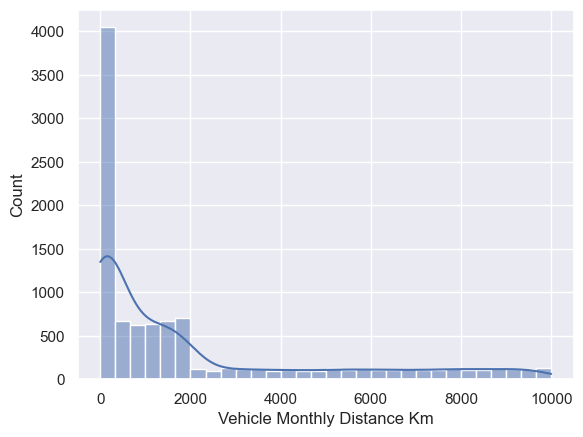

In [201]:
sns.histplot(ds['Vehicle Monthly Distance Km'], kde=True, bins=30)

<Axes: xlabel='How Many New Clothes Monthly', ylabel='Count'>

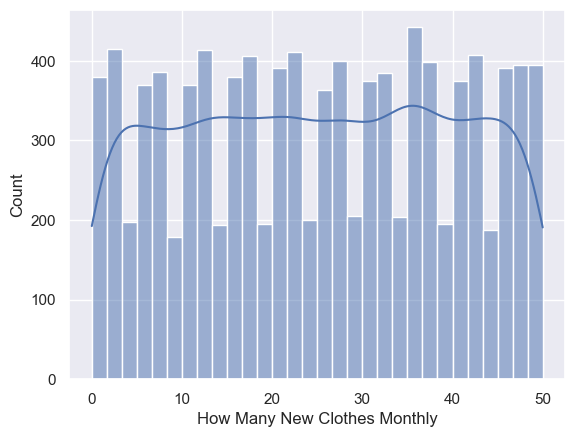

In [202]:
sns.histplot(ds['How Many New Clothes Monthly'], kde=True, bins=30)

<Axes: >

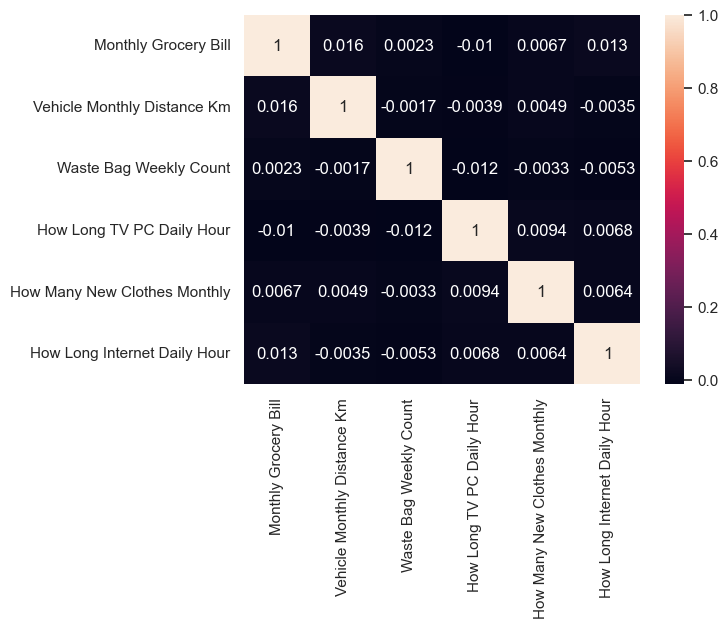

In [203]:
sns.heatmap(ds[num_cols].corr(), annot=True)

# 3. Split Dataset

In [204]:
train, test = train_test_split(ds, test_size=0.2, random_state=42)

<Axes: xlabel='CarbonEmission', ylabel='Density'>

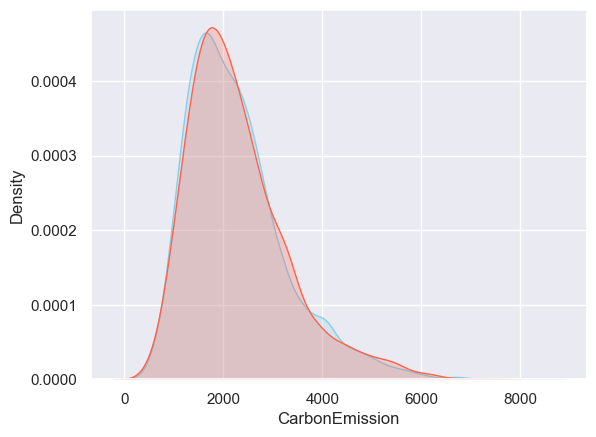

In [205]:
sns.kdeplot(train, x='CarbonEmission', fill=True, color='skyblue', label='Train')
sns.kdeplot(test, x='CarbonEmission', fill=True, color='tomato', label='Test')

In [206]:
from scipy.stats import ks_2samp
stat, p_value = ks_2samp(train[tar_col], test[tar_col])
# Print Results
print(f"KS Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The two distributions are significantly different.")
else:
    print("The two distributions are not significantly different.")

KS Statistic: 0.0243
P-Value: 0.3007
The two distributions are not significantly different.


In [207]:
X_train = train.drop('CarbonEmission', axis=1)  
y_train = train[tar_col]
X_test = test.drop('CarbonEmission', axis=1)  
y_test = test[tar_col]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((8000, 19), (8000,), (2000, 19), (2000,))

In [208]:
X_train

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With
9254,overweight,male,vegetarian,daily,wood,public,None,never,205,rarely,1044,small,1,13,27,8,Sometimes,"['Plastic', 'Glass', 'Metal']","['Stove', 'Oven', 'Microwave']"
1561,overweight,female,vegan,twice a day,natural gas,walk/bicycle,None,often,186,rarely,38,extra large,7,15,38,0,Sometimes,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']"
1670,obese,female,vegan,daily,natural gas,public,None,never,174,very frequently,171,medium,2,11,24,13,Yes,"['Paper', 'Plastic', 'Metal']",['Stove']
6087,overweight,female,vegan,twice a day,electricity,private,hybrid,sometimes,102,never,3364,small,1,20,16,17,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']"
6669,overweight,male,vegan,less frequently,wood,walk/bicycle,None,often,275,never,72,extra large,3,14,7,20,Sometimes,['Plastic'],"['Grill', 'Airfryer']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,overweight,male,vegetarian,less frequently,coal,private,electric,often,114,rarely,3711,medium,5,8,19,16,No,"['Plastic', 'Glass', 'Metal']",['Stove']
5191,overweight,female,omnivore,more frequently,coal,public,None,never,151,rarely,1861,small,2,7,1,23,Sometimes,"['Paper', 'Plastic']","['Oven', 'Microwave']"
5390,overweight,female,vegetarian,daily,natural gas,private,diesel,never,50,frequently,1216,medium,3,10,15,17,Yes,"['Paper', 'Plastic', 'Glass', 'Metal']",['Microwave']
860,obese,female,pescatarian,more frequently,wood,walk/bicycle,None,never,226,frequently,31,extra large,4,5,25,23,No,['Plastic'],"['Stove', 'Grill', 'Airfryer']"


# 4. Data pipeline

In [209]:
# Preprocessors
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing values with mean
    ('scaler', StandardScaler())                  # Scale numerical data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical data
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [210]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Monthly Grocery Bill',
                                  'Vehicle Monthly Distance Km',
                                  'Waste Bag Weekly Count',
                                  'How Long TV PC Daily Hour',
                                  'How Many New Clothes Monthly',
                                  'How Long Internet Daily Hour']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Body Type', 'Sex', 'Diet',
                                  'How Often Shower', 'Heating Energy Source',
                                  'Transport', 'Vehicle Type',
                                  'Social Activity',
                                  'Frequency of Traveling by Air',
                                  'Waste Bag Size', 'Energy efficiency',
                                  'Recycling', 'Cooking_With'])])

# 5. Model Pipeline

In [211]:
modelRegression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])
modelRegression 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Monthly Grocery Bill',
                                                   'Vehicle Monthly Distance '
                                                   'Km',
                                                   'Waste Bag Weekly Count',
                                                   'How Long TV PC Daily Hour',
                                                   'How Many New Clothes '
                                                   'Monthly',
                                                   'How Long Internet Daily '
                                                   'Hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Body Type', 'Sex', 'Diet',
                                                   'How Often Shower',
                                                   'Heating Energy Source',
                                                   'Transport', 'Vehicle Type',
                                                   'Social Activity',
                                                   'Frequency of Traveling by '
                                                   'Air',
                                                   'Waste Bag Size',
                                                   'Energy efficiency',
                                                   'Recycling',
                                                   'Cooking_With'])])),
                ('classifier', LinearRegression())])

In [212]:
modelRegression.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Monthly Grocery Bill',
                                                   'Vehicle Monthly Distance '
                                                   'Km',
                                                   'Waste Bag Weekly Count',
                                                   'How Long TV PC Daily Hour',
                                                   'How Many New Clothes '
                                                   'Monthly',
                                                   'How Long Internet Daily '
                                                   'Hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Body Type', 'Sex', 'Diet',
                                                   'How Often Shower',
                                                   'Heating Energy Source',
                                                   'Transport', 'Vehicle Type',
                                                   'Social Activity',
                                                   'Frequency of Traveling by '
                                                   'Air',
                                                   'Waste Bag Size',
                                                   'Energy efficiency',
                                                   'Recycling',
                                                   'Cooking_With'])])),
                ('classifier', LinearRegression())])

In [213]:
y_predLinearRegression = modelRegression.predict(X_test)

In [214]:
y_predLinearRegression[:5]

array([ 893.1373567 , 1721.23559755, 2139.37568056, 2993.46762716,
       2470.49672478])

In [215]:
mae2 = mean_absolute_error(y_test, y_predLinearRegression)
rmse2 = np.sqrt(mean_squared_error(y_test, y_predLinearRegression))
r22 = r2_score(y_test, y_predLinearRegression) 

print(f"MAE: {mae2:.4f}")
print(f"RMSE: {rmse2:.4f}")
print(f"R^2: {r22:.4f}") 

MAE: 175.6267
RMSE: 261.6141
R^2: 0.9342


In [216]:
print("y_test min:", y_test.min())
print("y_test max:", y_test.max())
print("y_test mean:", y_test.mean())

y_test min: 443
y_test max: 7337
y_test mean: 2291.512


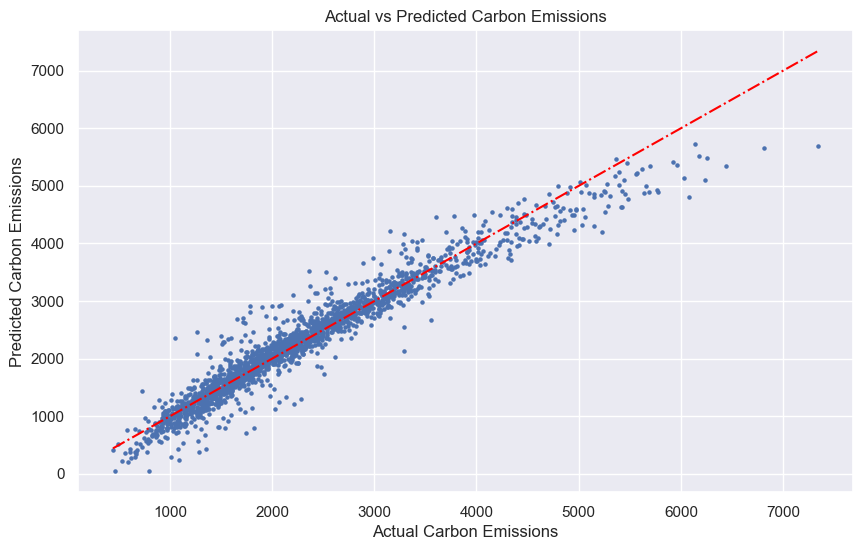

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predLinearRegression, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
# plt.grid()
plt.show()

# 6. Split to Category

In [218]:
category_mappings = {
            'Transportation': ['Transport', 'Vehicle Type', 'Vehicle Monthly Distance Km', 'Frequency of Traveling by Air'],
            'Home_Energy': ['Heating Energy Source', 'Energy efficiency', 'How Long TV PC Daily Hour', 'Cooking_With'],
            'Food_Diet': ['Diet', 'Monthly Grocery Bill'],
            'Shopping': ['How Many New Clothes Monthly', 'Waste Bag Size', 'Waste Bag Weekly Count', 'Recycling'],
            'Digital_Usage': ['How Long Internet Daily Hour']
}

encoders = {}

In [219]:
def _encode_features(X, context):
    """Encodes categorical features based on the provided context.
        This function checks if the context already has an encoder for each categorical column.
        We have to fit the encoder only once for each column in the context and save it in the encoders dictionary for future use.
        *Cannot use fit_transform here because it will fit the encoder every time we call this function, which is not desired. 


    Args:
        X (_type_): _description_
        context (_type_): _description_

    Returns:
        X_encoded (_type_): _description_
    """

    X_encoded = X.copy()

    if context not in encoders:
        encoders[context] = {} #Mapping context with encoders 
    
    for col in X_encoded.columns:
        if X_encoded[col].dtype == 'object':
            if col not in encoders[context]:
                encoders[context][col] = LabelEncoder()

            # Fit on non-null values only and fit one time 
            non_null_mask = X_encoded[col].notna() # Return a boolean mask of non-null values True = 1 and False = 0
            if non_null_mask.sum() > 0: # If at least one non-null value exists -> Fit the encoder 
                encoders[context][col].fit(X_encoded.loc[non_null_mask, col]) 

            # Transform the column using the fitted encoder
            non_null_mask = X_encoded[col].notna()
            if non_null_mask.sum() > 0:  # If at least one non-null value exists -> Transform the column
                X_encoded.loc[non_null_mask, col] = encoders[context][col].transform(X_encoded.loc[non_null_mask, col])

    return X_encoded

In [220]:
def predict_single_category(model_results, category, user_input):
    """Predicts the carbon emissions for a single category based on user input.

    Args:
        model_results (dict): Dictionary containing the trained models for each category.
        category (str): The category for which to make predictions.
        user_input (pd.DataFrame): DataFrame containing user input data.

    Returns:
        float: Predicted carbon emissions for the specified category.
    """
    if category not in model_results:
        raise ValueError(f"Model for category '{category}' not found.")

    
    # Use model_results  
    model_info = model_results[category]
    model = model_info['model']
    required_features = model_info['features']

    # Prepare input and check vaidation
    input_data = {}
    for feature in required_features:
        if feature in user_input:
            input_data[feature] = user_input[feature]
        else:
            # Use mean/mode for missing features
            if ds[feature].dtype == 'object':
                input_data[feature] = ds[feature].mode()[0]
            else:
                input_data[feature] = ds[feature].mean()


    
    # Create DataFrame for input data and encode features
    input_df = pd.DataFrame([input_data])
    input_encoded = _encode_features(input_df, f'{category}_model')

    # Predict 
    prediction = model.predict(input_encoded)[0]

    return {
        'category': category,
        'prediction': prediction,
        'confidence' : model_info['test_r2'],
        'features': input_data
    }


In [221]:
def create_category_models(target_method = 'hybrid',modeel_type = 'linear'):

    results = {}

    for category, features in category_mappings.items():
        print(f"\n--- Training {category} Model ---")
            
            # Get target column
        if target_method == 'percentage':
            target_col = f'{category}_target'
        elif target_method == 'feature_importance':
            target_col = f'{category}_target_fi'
        elif target_method == 'regression':
            target_col = f'{category}_target_reg'
        else:  # hybrid
            target_col = f'{category}_target_hybrid'
            
        if target_col not in ds.columns:
            print(f"Target column {target_col} not found. Skipping {category}")
            continue
            
        # Prepare features
        available_features = [f for f in features if f in ds.columns]
        if not available_features:
            print(f"No features available for {category}")
            continue

        X = ds[available_features].copy()
        y = ds[target_col].copy()

        X_encoded = _encode_features(X, f'{category}_model')

        # Remove missing values
        mask = ~X_encoded.isnull().any(axis=1) & ~y.isnull()
        X_clean = X_encoded[mask]
        y_clean = y[mask]

        if len(X_clean) < 30:
            print(f"Not enough data for {category} model. Skipping.")
            continue

        # Split data 
        X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

        # Train Linear Regression
        if modeel_type == 'linear':
            lr_model = LinearRegression()
            lr_model.fit(X_train, y_train)

            # Evaluate Linear Regression model

            train_lr_pred = lr_model.predict(X_train)
            test_lr_pred = lr_model.predict(X_test)
            train_lr_r2 = r2_score(y_train, train_lr_pred)
            test_lr_r2 = r2_score(y_test, test_lr_pred)
            train_lr_rmse = np.sqrt(mean_squared_error(y_train, train_lr_pred))
            test_lr_rmse = np.sqrt(mean_squared_error(y_test, test_lr_pred))

            
        
        # Train Random Forest Regressor
        elif modeel_type == 'rf':
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)

            # Evaluate Random Forest Regressor

            train_rf_pred = rf_model.predict(X_train)
            test_rf_pred = rf_model.predict(X_test) 
            train_rf_r2 = r2_score(y_train, train_rf_pred)
            test_rf_r2 = r2_score(y_test, test_rf_pred)
            train__rf_rmse = np.sqrt(mean_squared_error(y_train, train_rf_pred))
            test__rf_rmse = np.sqrt(mean_squared_error(y_test, test_rf_pred))

         
        results[category] = {
            'model': lr_model if modeel_type == 'linear' else rf_model,
            'features': available_features,
            'train_r2': train_lr_r2 if modeel_type == 'linear' else train_rf_r2,
            'test_r2': test_lr_r2 if modeel_type == 'linear' else test_rf_r2,
            'train_rmse': train_lr_rmse if modeel_type == 'linear' else train__rf_rmse,
            'test_rmse': test_lr_rmse if modeel_type == 'linear' else test__rf_rmse,
            'n_samples': len(X_clean),
            'target_mean': y_clean.mean(),
            'target_std': y_clean.std(),
         }
        return results 

## 6.1 Percentage_Based_Split

In [222]:
def percentage_based_split(ds,category_mappings):
    typical_percentages = {
        'Transportation': 0.29,
        'Home_Energy': 0.28,
        'Food_Diet': 0.23,
        'Shopping': 0.15,
        'Digital_Usage': 0.05
    }

    # Create categort target column 
    for category, percentage in typical_percentages.items():
        ds[f'{category}_target'] = ds[tar_col] * percentage

    # Verify the split 
    total_sum = sum(ds[f'{category}_target'] for category in category_mappings.keys())
    print(f"Original total mean: {ds['CarbonEmission'].mean():.2f}")
    print(f"Sum of categories mean: {total_sum.mean():.2f}")
    print(f"Difference: {abs(ds['CarbonEmission'].mean() - total_sum.mean()):.2f}")

    for category, percentage in typical_percentages.items():
        target_col = f'{category}_target'
        print(f"{category}: {percentage*100}% = {ds[target_col].mean():.2f} ± {ds[target_col].std():.2f}")
            
    return typical_percentages


In [223]:
percentage_based_split(ds, category_mappings) 

Original total mean: 2269.15
Sum of categories mean: 2269.15
Difference: 0.00
Transportation: 28.999999999999996% = 658.05 ± 295.13
Home_Energy: 28.000000000000004% = 635.36 ± 284.95
Food_Diet: 23.0% = 521.90 ± 234.07
Shopping: 15.0% = 340.37 ± 152.65
Digital_Usage: 5.0% = 113.46 ± 50.88


{'Transportation': 0.29,
 'Home_Energy': 0.28,
 'Food_Diet': 0.23,
 'Shopping': 0.15,
 'Digital_Usage': 0.05}

## 6.2 Feature Importance Split use RandomForestRegression

In [224]:
all_features = []
for features in category_mappings.values():
    all_features.extend(features)
        
        # Remove duplicates and get available features
available_features = list(set([f for f in all_features if f in ds.columns]))
print("Available Features:", available_features)


Available Features: ['Transport', 'Frequency of Traveling by Air', 'Recycling', 'Cooking_With', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour', 'How Many New Clothes Monthly', 'Waste Bag Size', 'Heating Energy Source', 'Diet', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Vehicle Type', 'Energy efficiency']


### 6.2.1 Numerical Features in each category

In [225]:
for category in category_mappings.keys():
    features = category_mappings[category]
    print(f"\nCategory: {category}")
    num_features = []
    cat_features = []
    for feature in features:
        if feature in num_cols:
            num_features.append(feature)
        elif feature in cat_cols:
            cat_features.append(feature)
    print(f"Numerical Features: {num_features}")
    print(f"Categorical Features: {cat_features}")
    print("----------------------\n")



Category: Transportation
Numerical Features: ['Vehicle Monthly Distance Km']
Categorical Features: ['Transport', 'Vehicle Type', 'Frequency of Traveling by Air']
----------------------


Category: Home_Energy
Numerical Features: ['How Long TV PC Daily Hour']
Categorical Features: ['Heating Energy Source', 'Energy efficiency', 'Cooking_With']
----------------------


Category: Food_Diet
Numerical Features: ['Monthly Grocery Bill']
Categorical Features: ['Diet']
----------------------


Category: Shopping
Numerical Features: ['How Many New Clothes Monthly', 'Waste Bag Weekly Count']
Categorical Features: ['Waste Bag Size', 'Recycling']
----------------------


Category: Digital_Usage
Numerical Features: ['How Long Internet Daily Hour']
Categorical Features: []
----------------------



In [226]:
def feature_importance_split(ds, category_mappings):
    all_features = []
    for features in category_mappings.values():
        all_features.extend(features)

    available_features = list(set([f for f in all_features if f in ds.columns]))

    X = ds[available_features].copy()
    y = ds[tar_col].copy()

    # Encode features
    X_encoded = _encode_features(X, 'global')

    # Remove rows with missing values
    mask = ~X_encoded.isnull().any(axis=1) & ~y.isnull()
    X_clean = X_encoded[mask]
    y_clean = y[mask]

    # Train a comprehensive model to get feature importances
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_clean, y_clean)

    feature_importance = pd.DataFrame({
        'feature': X_clean.columns,
        'importance': rf_model.feature_importances_
    })

    feature_importance_sort = feature_importance.sort_values(by='importance', ascending=False)
    print("Top 10 Features by Importance:")
    print(feature_importance_sort.head(10))

    # Group importance by category 
    category_importance = {}
    for category, features in category_mappings.items():
        cat_feats = [f for f in features if f in feature_importance['feature'].values]
        cat_importance = feature_importance[feature_importance['feature'].isin(cat_feats)]
        category_importance[category] = cat_importance['importance'].sum()

    # Normalize importance values 
    total_importance = sum(category_importance.values())
    category_percentages = {cat: imp / total_importance for cat, imp in category_importance.items()}

    # Create targets based on feature importance
    for category, percentage in category_percentages.items():
        target_col = f'{category}_target_fi'
        ds[target_col] = ds['CarbonEmission'] * percentage

    print("Feature Importance Based Percentages:")
    for category, percentage in category_percentages.items():
        print(f"{category}: {percentage*100:.1f}%")

    return category_percentages

In [227]:
feature_importance_split(ds, category_mappings)

Top 10 Features by Importance:
                          feature  importance
13                   Vehicle Type    0.344832
12    Vehicle Monthly Distance Km    0.306339
1   Frequency of Traveling by Air    0.168649
7    How Many New Clothes Monthly    0.045995
11           Monthly Grocery Bill    0.021996
4          Waste Bag Weekly Count    0.021266
6    How Long Internet Daily Hour    0.015331
8                  Waste Bag Size    0.015160
2                       Recycling    0.014490
5       How Long TV PC Daily Hour    0.013689
Feature Importance Based Percentages:
Transportation: 82.0%
Home_Energy: 3.9%
Food_Diet: 2.9%
Shopping: 9.7%
Digital_Usage: 1.5%


{'Transportation': 0.8198190031808443,
 'Home_Energy': 0.03864971216943814,
 'Food_Diet': 0.02928942902060133,
 'Shopping': 0.0969113235686005,
 'Digital_Usage': 0.015330532060515548}

## 6.3 Regression Based Split

In [228]:
def regression_based_split(ds, category_mappings):

    category_contributions = {} 

    for category, features in category_mappings.items():
        print(f"\n--- Training {category} Model ---")
        
        # Prepare features
        available_features = [f for f in features if f in ds.columns]
        if not available_features:
            print(f"No features available for {category}")
            continue

        X = ds[available_features].copy()
        y = ds[tar_col].copy()

        X_encoded = _encode_features(X, category)

        # Remove missing values
        mask = ~X_encoded.isnull().any(axis=1) & ~y.isnull()
        X_clean = X_encoded[mask]
        y_clean = y[mask]

        if len(X_clean) < 50:
            print(f"Not enough data for {category} model. Skipping.")
            continue

        # Split data 
        X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

        # Train model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
            
        # Predict on full dataset
        predictions = model.predict(X_clean)
            
        # Calculate what percentage of actual emissions this category can explain
        r2 = r2_score(y_clean, predictions)
            
        # Use R² score to estimate this category's contribution
        # Higher R² means this category explains more variance
        category_contributions[category] = {
            'r2_score': r2,
            'model': model,
            'sample_size': len(X_clean)
        }
            
        print(f"{category} R² score: {r2:.3f} (n={len(X_clean)})")
        
        # Normalize R² scores to create percentage splits
    total_r2 = sum([contrib['r2_score'] for contrib in category_contributions.values() if contrib['r2_score'] > 0])
        
    regression_percentages = {}
    for category, contrib in category_contributions.items():
        if contrib['r2_score'] > 0:
            percentage = max(0, contrib['r2_score'] / total_r2)
            regression_percentages[category] = percentage
                
            # Create target column
            target_col = f'{category}_target_reg'
            ds[target_col] = ds['CarbonEmission'] * percentage
        
    print("\nRegression-based Percentages:")
    for category, percentage in regression_percentages.items():
        print(f"{category}: {percentage*100:.1f}%")
            
    return regression_percentages

In [229]:
regression_based_split(ds, category_mappings)


--- Training Transportation Model ---
Transportation R² score: 0.916 (n=3279)

--- Training Home_Energy Model ---
Home_Energy R² score: 0.306 (n=10000)

--- Training Food_Diet Model ---
Food_Diet R² score: 0.080 (n=10000)

--- Training Shopping Model ---
Shopping R² score: 0.573 (n=10000)

--- Training Digital_Usage Model ---
Digital_Usage R² score: 0.003 (n=10000)

Regression-based Percentages:
Transportation: 48.8%
Home_Energy: 16.3%
Food_Diet: 4.3%
Shopping: 30.5%
Digital_Usage: 0.1%


{'Transportation': 0.48773503682192965,
 'Home_Energy': 0.16295538860240855,
 'Food_Diet': 0.042712402445162084,
 'Shopping': 0.3052457954332439,
 'Digital_Usage': 0.0013513766972557885}

In [230]:
def hybrid_approach(ds, category_mappings):
    """Combines percentage, feature importance, and regression-based splits into a hybrid approach."""
    
    # Get percentage-based splits
    percentage_splits = percentage_based_split(ds, category_mappings)
    
    # Get feature importance-based splits
    feature_importance_splits = feature_importance_split(ds, category_mappings)
    
    # Get regression-based splits
    regression_splits = regression_based_split(ds, category_mappings)
    
    # Combine all splits into a single dictionary
    hybrid_percentages = {}
    weights = {'method1': 0.4, 'method2': 0.3, 'method3': 0.3}  # Adjust these weights
    all_categories = (percentage_splits.keys()) | set(feature_importance_splits.keys()) | set(regression_splits.keys())
        
    for category in all_categories:
        weighted_sum = 0
        weight_sum = 0

        if category in percentage_splits:
            weighted_sum += percentage_splits[category] * weights['method1']
            weight_sum += weights['method1']

        if category in feature_importance_splits:
            weighted_sum += feature_importance_splits[category] * weights['method2']
            weight_sum += weights['method2']

        if category in regression_splits:
            weighted_sum += regression_splits[category] * weights['method3']
            weight_sum += weights['method3']

        if weight_sum > 0:
            hybrid_percentages[category] = weighted_sum / weight_sum

    # Normalize to ensure they sum to 1
    total_hybrid = sum(hybrid_percentages.values())
    hybrid_percentages = {cat: pct/total_hybrid for cat, pct in hybrid_percentages.items()}

    #Create final hybrid targets
    for category, percentage in hybrid_percentages.items():
        target_col = f'{category}_target_hybrid'
        ds[target_col] = ds['CarbonEmission'] * percentage
            
    print("Final Hybrid Percentages:")
    for category, percentage in hybrid_percentages.items():
        print(f"{category}: {percentage*100:.1f}%")
            
    return hybrid_percentages
        

In [231]:
hybrid_approach(ds, category_mappings)

Original total mean: 2269.15
Sum of categories mean: 2269.15
Difference: 0.00
Transportation: 28.999999999999996% = 658.05 ± 295.13
Home_Energy: 28.000000000000004% = 635.36 ± 284.95
Food_Diet: 23.0% = 521.90 ± 234.07
Shopping: 15.0% = 340.37 ± 152.65
Digital_Usage: 5.0% = 113.46 ± 50.88
Top 10 Features by Importance:
                          feature  importance
13                   Vehicle Type    0.344832
12    Vehicle Monthly Distance Km    0.306339
1   Frequency of Traveling by Air    0.168649
7    How Many New Clothes Monthly    0.045995
11           Monthly Grocery Bill    0.021996
4          Waste Bag Weekly Count    0.021266
6    How Long Internet Daily Hour    0.015331
8                  Waste Bag Size    0.015160
2                       Recycling    0.014490
5       How Long TV PC Daily Hour    0.013689
Feature Importance Based Percentages:
Transportation: 82.0%
Home_Energy: 3.9%
Food_Diet: 2.9%
Shopping: 9.7%
Digital_Usage: 1.5%

--- Training Transportation Model ---
Transp

{'Home_Energy': 0.17248153023155405,
 'Shopping': 0.18064713570055335,
 'Digital_Usage': 0.025004572627331408,
 'Transportation': 0.5082662120008322,
 'Food_Diet': 0.11360054943972905}

In [232]:
ds

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,...,Transportation_target_reg,Home_Energy_target_reg,Food_Diet_target_reg,Shopping_target_reg,Digital_Usage_target_reg,Home_Energy_target_hybrid,Shopping_target_hybrid,Digital_Usage_target_hybrid,Transportation_target_hybrid,Food_Diet_target_hybrid
0,overweight,female,pescatarian,daily,coal,public,None,often,230,frequently,...,1091.551012,364.694160,95.590357,683.140090,3.024381,386.013665,404.288290,55.960234,1137.499782,254.238030
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,...,922.794690,308.311595,80.811865,577.525045,2.556805,326.335055,341.784381,47.308651,961.639673,214.932240
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,1265.672421,422.869233,110.838684,792.112839,3.506823,447.589571,468.779317,64.886866,1318.950820,294.793426
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,...,523.827430,175.014087,45.873120,327.833984,1.451379,185.245163,194.015024,26.854911,545.877912,122.006990
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,2313.327280,772.897408,202.584925,1447.780808,6.409580,818.079898,856.809365,118.596688,2410.706644,538.807406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,...,1174.465969,392.396576,102.851465,735.031875,3.254115,415.335525,434.998303,60.211011,1223.905038,273.550123
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,...,1504.174854,502.554418,131.725049,941.378033,4.167646,531.933039,557.115767,77.114102,1567.492998,350.344094
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,None,sometimes,298,very frequently,...,1159.346183,387.344959,101.527381,725.569256,3.212222,409.988597,429.398242,59.435869,1208.148786,270.028506
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,...,2230.900058,745.357947,195.366529,1396.194268,6.181197,788.930519,826.279999,114.370915,2324.809654,519.608913


In [233]:
for category in category_mappings.keys():
    features = category_mappings[category]
    print(f"\nCategory: {category}")
    num_features = []
    cat_features = []
    for feature in features:
        if feature in num_cols:
            num_features.append(feature)
        elif feature in cat_cols:
            cat_features.append(feature)
    print(f"Numerical Features: {num_features}")
    print(f"Categorical Features: {cat_features}")
    print("----------------------\n")



Category: Transportation
Numerical Features: ['Vehicle Monthly Distance Km']
Categorical Features: ['Transport', 'Vehicle Type', 'Frequency of Traveling by Air']
----------------------


Category: Home_Energy
Numerical Features: ['How Long TV PC Daily Hour']
Categorical Features: ['Heating Energy Source', 'Energy efficiency', 'Cooking_With']
----------------------


Category: Food_Diet
Numerical Features: ['Monthly Grocery Bill']
Categorical Features: ['Diet']
----------------------


Category: Shopping
Numerical Features: ['How Many New Clothes Monthly', 'Waste Bag Weekly Count']
Categorical Features: ['Waste Bag Size', 'Recycling']
----------------------


Category: Digital_Usage
Numerical Features: ['How Long Internet Daily Hour']
Categorical Features: []
----------------------



# 7.Final Results

1. Transportation : 50.82%
    - Num_Category : 'Vehicle Monthly Distance Km'
    - Cat_Category : 'Transport', 'Vehicle Type', 'Frequency of Traveling by Air'
2. Shopping : 18.06%
    - Num_Category : 'How Many New Clothes Monthly', 'Waste Bag Weekly Count'
    - Cat_Category : 'Waste Bag Size', 'Recycling'
3. HomeEnergy : 17.25%
    - Num_Category : 'How Long TV PC Daily Hour'
    - Cat_Category : 'Heating Energy Source', 'Energy efficiency', 'Cooking_With'
4. Foot Diet : 11.36%
    - Num_Category : 'Monthly Grocery Bill'
    - Cat_Category :''Diet'
5. Digital_Usage : 2.6%:
    - Num_Category : 'How Long Internet Daily Hour'
    - Cat_Category :


In [317]:
ds['Transport'].value_counts()

Transport
walk/bicycle    3427
public          3294
private         3279
Name: count, dtype: int64

In [234]:
transportation_features = ['Transport', 'Vehicle Type', 'Vehicle Monthly Distance Km', 'Frequency of Traveling by Air']
home_energy_features = ['Heating Energy Source', 'Energy efficiency', 'How Long TV PC Daily Hour', 'Cooking_With']
food_diet_features = ['Diet', 'Monthly Grocery Bill']
shopping_features = ['How Many New Clothes Monthly', 'Waste Bag Size', 'Waste Bag Weekly Count', 'Recycling']
digital_usage_features = ['How Long Internet Daily Hour']

In [235]:
ds.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission',
       'Transportation_target', 'Home_Energy_target', 'Food_Diet_target',
       'Shopping_target', 'Digital_Usage_target', 'Transportation_target_fi',
       'Home_Energy_target_fi', 'Food_Diet_target_fi', 'Shopping_target_fi',
       'Digital_Usage_target_fi', 'Transportation_target_reg',
       'Home_Energy_target_reg', 'Food_Diet_target_reg', 'Shopping_target_reg',
       'Digital_Usage_target_reg', 'Home_Energy_target_hybrid',
       'Shopping_target_hybrid', 'Digital_Usage_target_hybrid',
       'Transportation_target_hybrid', 'Food

In [236]:
# Preprocessors
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing values with mean
    ('scaler', StandardScaler())                  # Scale numerical data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical data
])


In [257]:
def evaluate_model(X_train, y_train, X_test, y_test, preprocessor) -> pd.DataFrame:
    models_all = {
        'Linear Regression': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', LinearRegression())
        ]),
        'Random Forest': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', RandomForestRegressor(random_state=42))
        ]),
        'Ridge Regression': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', Ridge(random_state=42))
        ]),
        'Lasso Regression': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', Lasso(random_state=42))
        ]),
        'Gradient Boosting': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', GradientBoostingRegressor(random_state=42))
        ]),
        'XGBoost': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('regressor', XGBRegressor(random_state=42, verbosity=0))
        ]),
        'Polynomial Regression (deg=2)': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('poly', PolynomialFeatures(degree=2)),
            ('regressor', LinearRegression())
        ]),
        'Polynomial Regression (deg=3)': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('poly', PolynomialFeatures(degree=3)),
            ('regressor', LinearRegression())
        ]),
        'Polynomial Regression (deg=4)': Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('poly', PolynomialFeatures(degree=4)),
            ('regressor', LinearRegression())
        ])
        
        
    }

    # Fit and evaluate all models
    all_results = []

    for name, model in models_all.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        all_results.append({
            'Model': name,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        })

    return pd.DataFrame(all_results).sort_values(by='R²', ascending=False)

## 7.1 Transportation

In [327]:
trans_cols = transportation_features + ['Transportation_target_hybrid']

transportation_table = ds[trans_cols]
transportation_table.head(5)

,Transport,Vehicle Type,Vehicle Monthly Distance Km,Frequency of Traveling by Air,Transportation_target_hybrid
0,public,None,210,frequently,1137.499782
1,walk/bicycle,None,9,rarely,961.639673
2,private,petrol,2472,never,1318.950820
3,walk/bicycle,None,74,rarely,545.877912
4,private,diesel,8457,very frequently,2410.706644


In [328]:
transportation_table.describe()

,Vehicle Monthly Distance Km,Transportation_target_hybrid
count,10000.000000,10000.000000
mean,2031.485900,1153.330903
std,2769.715597,517.249943
min,0.000000,155.529461
25%,69.000000,781.713434
50%,823.000000,1057.193721
75%,2516.750000,1406.880875
max,9999.000000,4257.746058


In [329]:
transportation_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transport                      10000 non-null  object 
 1   Vehicle Type                   3279 non-null   object 
 2   Vehicle Monthly Distance Km    10000 non-null  int64  
 3   Frequency of Traveling by Air  10000 non-null  object 
 4   Transportation_target_hybrid   10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [330]:
transport_train, transport_test = train_test_split(transportation_table, test_size=0.2, random_state=42)

In [331]:
num_cols_transport = [c for c in num_cols if c in transportation_features]
cat_cols_transport = [c for c in cat_cols if c in transportation_features] 

num_cols_transport, cat_cols_transport

(['Vehicle Monthly Distance Km'],
 ['Transport', 'Vehicle Type', 'Frequency of Traveling by Air'])

In [332]:
transport_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols_transport),
        ('cat', categorical_transformer, cat_cols_transport)
    ]
)

In [333]:
X_transport_train = transport_train.drop('Transportation_target_hybrid', axis=1)  
y_transport_train = transport_train['Transportation_target_hybrid']
X_transport_test = transport_test.drop('Transportation_target_hybrid', axis=1)  
y_transport_test = transport_test['Transportation_target_hybrid']

X_transport_train.shape, y_transport_train.shape, X_transport_test.shape, y_transport_test.shape

((8000, 4), (8000,), (2000, 4), (2000,))

In [334]:
X_transport_train

,Transport,Vehicle Type,Vehicle Monthly Distance Km,Frequency of Traveling by Air
9254,public,None,1044,rarely
1561,walk/bicycle,None,38,rarely
1670,public,None,171,very frequently
6087,private,hybrid,3364,never
6669,walk/bicycle,None,72,never
...,...,...,...,...
5734,private,electric,3711,rarely
5191,public,None,1861,rarely
5390,private,diesel,1216,frequently
860,walk/bicycle,None,31,frequently


In [335]:
results_transport = evaluate_model(X_transport_train, y_transport_train, X_transport_test, y_transport_test, transport_preprocessor)
results_transport

,Model,MAE,RMSE,R²
6,Polynomial Regression (deg=2),196.069744,247.362837,0.772189
8,Polynomial Regression (deg=4),196.592811,247.608536,0.771736
7,Polynomial Regression (deg=3),196.410036,247.817715,0.771350
4,Gradient Boosting,197.423588,248.921848,0.769308
5,XGBoost,205.133325,259.152006,0.749957
3,Lasso Regression,212.769322,268.760575,0.731071
2,Ridge Regression,213.097646,268.863071,0.730866
0,Linear Regression,213.116086,268.874964,0.730842
1,Random Forest,222.928422,283.234752,0.701325


In [336]:
bestModelTransport = Pipeline(steps=[
    ('preprocessor', transport_preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

In [337]:
bestModelTransport.fit(X_transport_train, y_transport_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Vehicle Monthly Distance '
                                                   'Km']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Transport', 'Vehicle Type',
                                                   'Frequency of Traveling by '
                                                   'Air'])])),
                ('poly', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [338]:
yPredTransport = bestModelTransport.predict(X_transport_test)

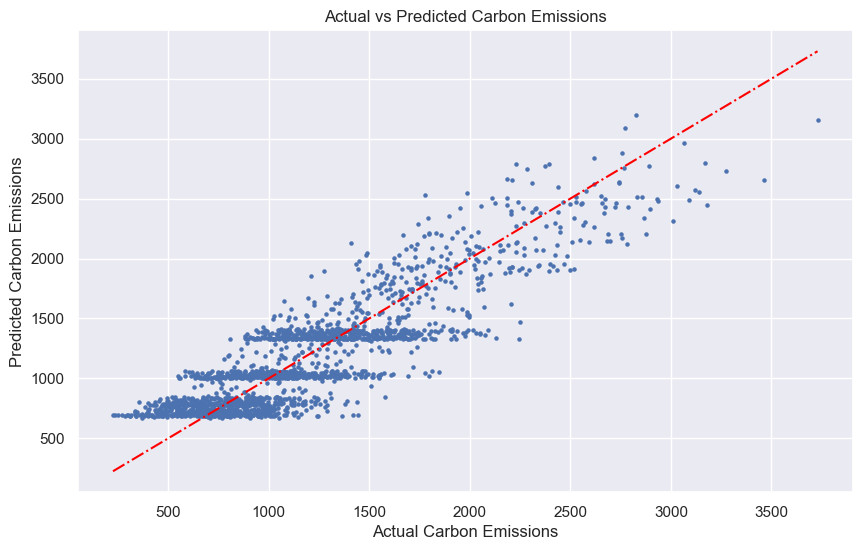

In [339]:
plt.figure(figsize=(10, 6))
plt.scatter(y_transport_test, yPredTransport, s=5)
plt.plot([min(y_transport_test), max(y_transport_test)], [min(y_transport_test), max(y_transport_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
# plt.grid()
plt.show()

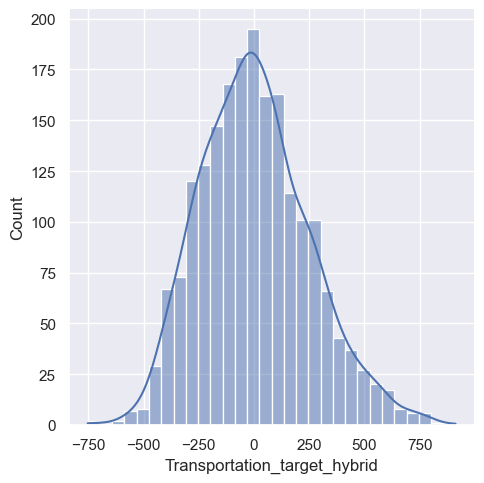

In [340]:
residuals_tr = y_transport_test - yPredTransport
sns.displot(residuals_tr, bins = 30,kde=True)

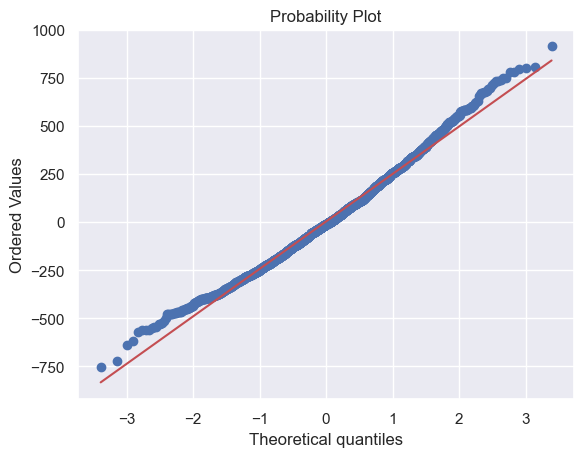

In [341]:
stats.probplot(residuals_tr, dist="norm", plot=pylab)
pylab.show()

### Review :
- Linear Regression with Poly (deg = 3) performed good on this category with 81% R^2

In [320]:
X_transport_test

,Transport,Vehicle Type,Vehicle Monthly Distance Km,Frequency of Traveling by Air
8936,private,electric,9124,never
8406,private,lpg,3091,rarely
4905,private,diesel,1469,never
213,private,lpg,3176,very frequently
6057,private,petrol,2388,never
...,...,...,...,...
671,private,diesel,1181,never
4705,private,electric,6674,rarely
1790,private,hybrid,1523,rarely
1000,private,electric,1919,never


In [344]:
input_data = pd.DataFrame([{
    "Transport": "public",
    "Vehicle Type": "None",
    "Vehicle Monthly Distance Km": 500,
    "Frequency of Traveling by Air": "never"
}])

bestModelTransport.predict(input_data)[0]

746.733212258643

## 7.2 Home Energy

In [147]:
home_energy_cols = home_energy_features + ['Home_Energy_target_hybrid']

home_energy_table = ds[home_energy_cols].dropna()
home_energy_table.head(5)

,Heating Energy Source,Energy efficiency,How Long TV PC Daily Hour,Cooking_With,Home_Energy_target_hybrid
0,coal,No,7,"['Stove', 'Oven']",386.013665
1,natural gas,No,9,"['Stove', 'Microwave']",326.335055
2,wood,Sometimes,14,"['Oven', 'Microwave']",447.589571
3,wood,Sometimes,20,"['Microwave', 'Grill', 'Airfryer']",185.245163
4,coal,Yes,3,['Oven'],818.079898


In [150]:
home_energy_table.drop('Cooking_With', axis=1, inplace=True)

In [151]:
home_energy_table.describe()

,How Long TV PC Daily Hour,Home_Energy_target_hybrid
count,10000.000000,10000.000000
mean,12.139200,391.385999
std,7.106369,175.530184
min,0.000000,52.779348
25%,6.000000,265.276593
50%,12.000000,358.761583
75%,18.000000,477.428876
max,24.000000,1444.877779


In [152]:
# Home Energy Category
home_energy_cols = home_energy_features + ['Home_Energy_target_hybrid']
home_energy_table = ds[home_energy_cols].dropna()
home_energy_train, home_energy_test = train_test_split(home_energy_table, test_size=0.2, random_state=42)

X_home_energy_train = home_energy_train.drop('Home_Energy_target_hybrid', axis=1)  
y_home_energy_train = home_energy_train['Home_Energy_target_hybrid']
X_home_energy_test = home_energy_test.drop('Home_Energy_target_hybrid', axis=1)  
y_home_energy_test = home_energy_test['Home_Energy_target_hybrid']

In [153]:
numerical_home_energy_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing values with mean
    ('scaler',StandardScaler())                  # Scale numerical data
])

categorical_home_energy_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical data
])

In [157]:
# Home Energy Category
num_cols_home_energy = [c for c in num_cols if c in home_energy_features]
cat_cols_home_energy = [c for c in cat_cols if c in home_energy_features and c != 'Cooking_With']

home_energy_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_home_energy_transformer, num_cols_home_energy),
        ('cat', categorical_home_energy_transformer, cat_cols_home_energy)
    ]
)

In [345]:
for col in cat_cols_home_energy:
    print(f"\n{col} unique values:")
    print(home_energy_table[col].unique())


Heating Energy Source unique values:
['coal' 'natural gas' 'wood' 'electricity']

Energy efficiency unique values:
['No' 'Sometimes' 'Yes']


In [259]:
results_home_energy = evaluate_model(X_home_energy_train, y_home_energy_train, X_home_energy_test, y_home_energy_test, home_energy_preprocessor)
results_home_energy

,Model,MAE,RMSE,R²
2,Ridge Regression,133.145296,174.119216,0.019841
3,Lasso Regression,133.116250,174.134615,0.019667
0,Linear Regression,133.165359,174.162089,0.019358
6,Polynomial Regression (deg=2),133.134109,174.368695,0.017030
4,Gradient Boosting,133.563815,174.573601,0.014718
7,Polynomial Regression (deg=3),133.720163,174.692494,0.013376
8,Polynomial Regression (deg=4),133.628138,174.954521,0.010414
5,XGBoost,135.868725,177.300897,-0.016308
1,Random Forest,136.017304,177.548241,-0.019145


In [275]:
bestModelHomeEnergy = Pipeline(steps=[
    ('preprocessor', home_energy_preprocessor),
    ('regressor', Ridge(random_state=42))
])
bestModelHomeEnergy.fit(X_home_energy_train, y_home_energy_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['How Long TV PC Daily '
                                                   'Hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Heating Energy Source',
                                                   'Energy efficiency'])])),
                ('regressor', Ridge(random_state=42))])

In [276]:
yPredHomeEnergy = bestModelHomeEnergy.predict(X_home_energy_test)

MAE: 133.1453
RMSE: 174.1192
R22: 0.0198


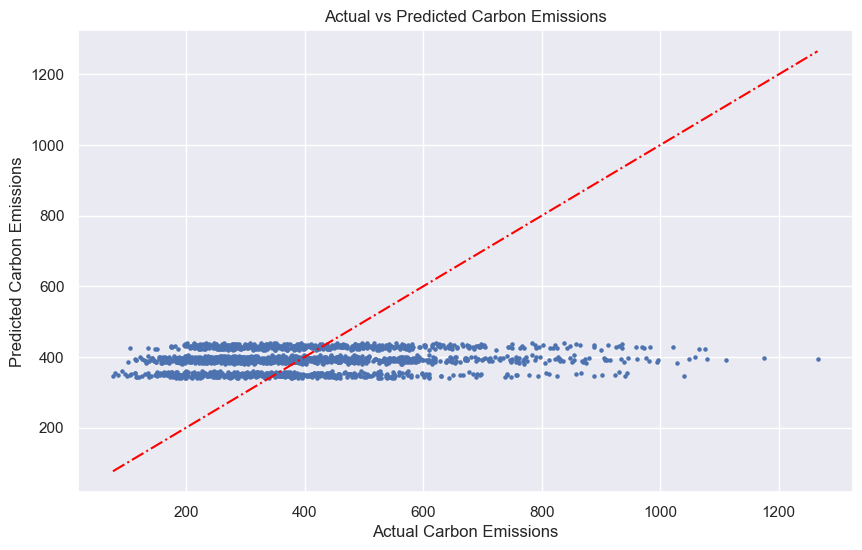

In [291]:
home_energy_mae2 = mean_absolute_error(y_home_energy_test, yPredHomeEnergy)
home_energy_rmse2 = np.sqrt(mean_squared_error(y_home_energy_test, yPredHomeEnergy))
home_energy_r22 = r2_score(y_home_energy_test,yPredHomeEnergy) 

print(f"MAE: {home_energy_mae2:.4f}")
print(f"RMSE: {home_energy_rmse2:.4f}")
print(f"R22: {home_energy_r22:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_home_energy_test, yPredHomeEnergy, s=5)
plt.plot([min(y_home_energy_test), max(y_home_energy_test)], [min(y_home_energy_test), max(y_home_energy_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
# plt.grid()
plt.show()

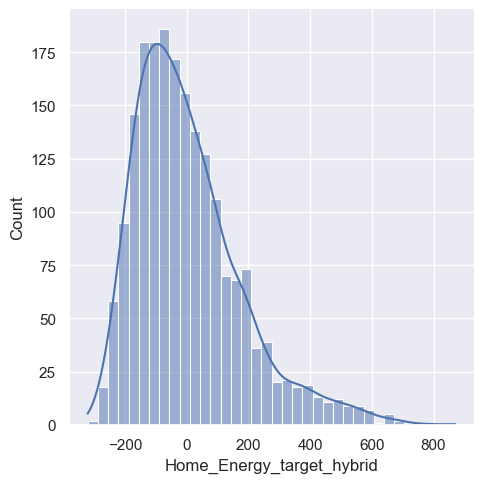

In [278]:
residuals_he = y_home_energy_test - yPredHomeEnergy
sns.displot(residuals_he,kde=True)

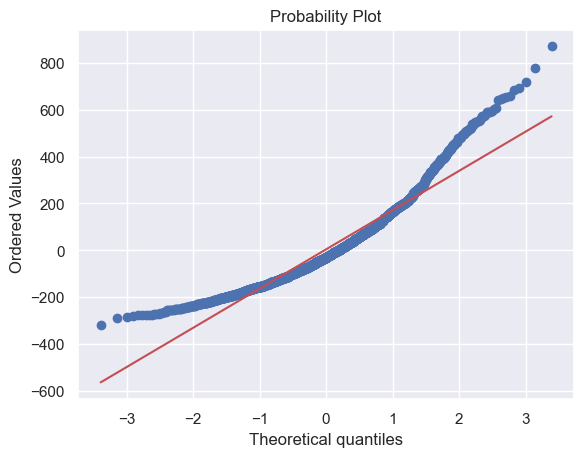

In [279]:
stats.probplot(residuals_he, dist="norm", plot=pylab)
pylab.show()

In [346]:
home_energy_input = pd.DataFrame([{
    "Heating Energy Source": "coal",
    "Energy efficiency": "No",
    "How Long TV PC Daily Hour": 2,
}])

print(bestModelHomeEnergy.predict(home_energy_input))


[427.13151543]


## 7.3 Food Diet

In [77]:
food_diet_cols = food_diet_features + ['Food_Diet_target_hybrid']

food_diet_table = ds[food_diet_cols].dropna()
food_diet_table.head(5)

,Diet,Monthly Grocery Bill,Food_Diet_target_hybrid
0,pescatarian,230,254.238030
1,vegetarian,114,214.932240
2,omnivore,138,294.793426
3,omnivore,157,122.006990
4,vegetarian,266,538.807406


In [78]:
food_diet_cols = food_diet_features + ['Food_Diet_target_hybrid']
food_diet_table = ds[food_diet_cols].dropna()
food_diet_train, food_diet_test = train_test_split(food_diet_table, test_size=0.2, random_state=42)

X_food_diet_train = food_diet_train.drop('Food_Diet_target_hybrid', axis=1)  
y_food_diet_train = food_diet_train['Food_Diet_target_hybrid']
X_food_diet_test = food_diet_test.drop('Food_Diet_target_hybrid', axis=1)  
y_food_diet_test = food_diet_test['Food_Diet_target_hybrid']

In [113]:
# Create feature columns
num_cols_food_diet = [c for c in num_cols if c in food_diet_features]
cat_cols_food_diet = [c for c in cat_cols if c in food_diet_features]

# Create preprocessor and model
food_diet_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols_food_diet),
        ('cat', categorical_transformer, cat_cols_food_diet)
    ]
)



In [349]:
print(food_diet_table['Diet'].unique())

['pescatarian' 'vegetarian' 'omnivore' 'vegan']


In [260]:
results_food_diet = evaluate_model(X_food_diet_train, y_food_diet_train, X_food_diet_test, y_food_diet_test, food_diet_preprocessor)
results_food_diet

,Model,MAE,RMSE,R²
3,Lasso Regression,87.698486,115.333640,0.008621
0,Linear Regression,87.682546,115.351106,0.008321
2,Ridge Regression,87.698694,115.351881,0.008308
7,Polynomial Regression (deg=3),87.771235,115.490911,0.005916
6,Polynomial Regression (deg=2),87.741510,115.521773,0.005384
8,Polynomial Regression (deg=4),87.783253,115.618630,0.003716
4,Gradient Boosting,88.098051,115.807707,0.000455
5,XGBoost,91.409421,120.059873,-0.074295
1,Random Forest,94.338924,123.444652,-0.135722


In [280]:
bestModelFoodDiet = Pipeline(steps=[
    ('preprocessor', food_diet_preprocessor),
    ('regressor', Lasso(random_state=42))
])
bestModelFoodDiet.fit(X_food_diet_train, y_food_diet_train)
yPredFoodDiet = bestModelFoodDiet.predict(X_food_diet_test)

MAE: 87.6985
RMSE: 115.3336
R22: 0.0086


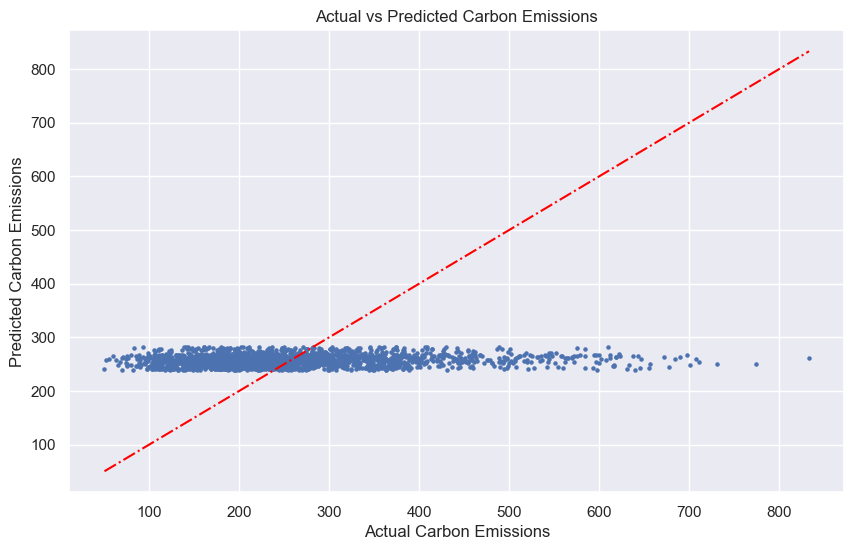

In [290]:
food_diet_mae2 = mean_absolute_error(y_food_diet_test, yPredFoodDiet)
food_diet_rmse2 = np.sqrt(mean_squared_error(y_food_diet_test, yPredFoodDiet))
food_diet_r22 = r2_score(y_food_diet_test,yPredFoodDiet) 

print(f"MAE: {food_diet_mae2:.4f}")
print(f"RMSE: {food_diet_rmse2:.4f}")
print(f"R22: {food_diet_r22:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_food_diet_test, yPredFoodDiet, s=5)
plt.plot([min(y_food_diet_test), max(y_food_diet_test)], [min(y_food_diet_test), max(y_food_diet_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
# plt.grid()
plt.show()

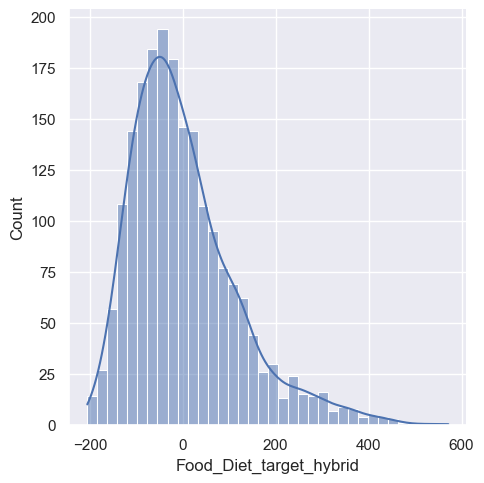

In [283]:
residuals_fd = y_food_diet_test - yPredFoodDiet
sns.displot(residuals_fd,kde=True)

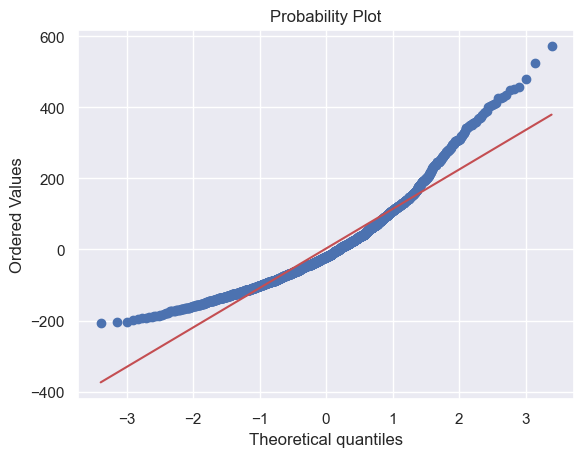

In [284]:
stats.probplot(residuals_fd, dist="norm", plot=pylab)
pylab.show()

## 7.4 Shopping

In [85]:
shopping_cols = shopping_features + ['Shopping_target_hybrid']
shopping_table = ds[shopping_cols].dropna()
shopping_table.head(5)

,How Many New Clothes Monthly,Waste Bag Size,Waste Bag Weekly Count,Recycling,Shopping_target_hybrid
0,26,large,4,['Metal'],404.288290
1,38,extra large,3,['Metal'],341.784381
2,47,small,1,['Metal'],468.779317
3,5,medium,3,"['Paper', 'Plastic', 'Glass', 'Metal']",194.015024
4,5,large,1,['Paper'],856.809365


In [86]:
shopping_cols = shopping_features + ['Shopping_target_hybrid']
shopping_table = ds[shopping_cols].dropna()
shopping_train, shopping_test = train_test_split(shopping_table, test_size=0.2, random_state=42)

X_shopping_train = shopping_train.drop('Shopping_target_hybrid', axis=1)  
y_shopping_train = shopping_train['Shopping_target_hybrid']
X_shopping_test = shopping_test.drop('Shopping_target_hybrid', axis=1)  
y_shopping_test = shopping_test['Shopping_target_hybrid']

In [87]:
num_cols_shopping = [c for c in num_cols if c in shopping_features]
cat_cols_shopping = [c for c in cat_cols if c in shopping_features]

# Create preprocessor and model
shopping_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols_shopping),
        ('cat', categorical_transformer, cat_cols_shopping)
    ]
)

modelShoppingRegression = Pipeline(steps=[
    ('preprocessor', shopping_preprocessor),
    ('classifier', LinearRegression())
])

In [347]:
for col in cat_cols_shopping:
    print(f"\n{col} unique values:")
    print(shopping_table[col].unique())


Waste Bag Size unique values:
['large' 'extra large' 'small' 'medium']

Recycling unique values:
["['Metal']" "['Paper', 'Plastic', 'Glass', 'Metal']" "['Paper']"
 "['Paper', 'Glass', 'Metal']" '[]' "['Paper', 'Plastic', 'Glass']"
 "['Glass']" "['Paper', 'Plastic']" "['Plastic']"
 "['Plastic', 'Glass', 'Metal']" "['Paper', 'Plastic', 'Metal']"
 "['Paper', 'Glass']" "['Paper', 'Metal']" "['Glass', 'Metal']"
 "['Plastic', 'Glass']" "['Plastic', 'Metal']"]


In [261]:
results_shopping = evaluate_model(X_shopping_train, y_shopping_train, X_shopping_test, y_shopping_test, shopping_preprocessor)
results_shopping

,Model,MAE,RMSE,R²
2,Ridge Regression,133.021806,174.934813,0.098058
0,Linear Regression,133.022948,174.936690,0.098038
3,Lasso Regression,133.068958,174.958134,0.097817
6,Polynomial Regression (deg=2),133.345655,175.576865,0.091425
4,Gradient Boosting,133.982691,175.967227,0.087380
7,Polynomial Regression (deg=3),134.115582,177.408582,0.072368
8,Polynomial Regression (deg=4),135.579656,179.350684,0.051947
5,XGBoost,143.556654,188.404350,-0.046184
1,Random Forest,149.782772,197.032204,-0.144197


In [285]:
bestModelShopping = Pipeline(steps=[
    ('preprocessor', shopping_preprocessor),
    ('regressor', Ridge(random_state=42))
])
bestModelShopping.fit(X_shopping_train, y_shopping_train)
yPredShopping = bestModelShopping.predict(X_shopping_test)

MAE: 133.0218
RMSE: 174.9348
R22: 0.0981


Text(0.5, 0, 'Actual Carbon Emissions')

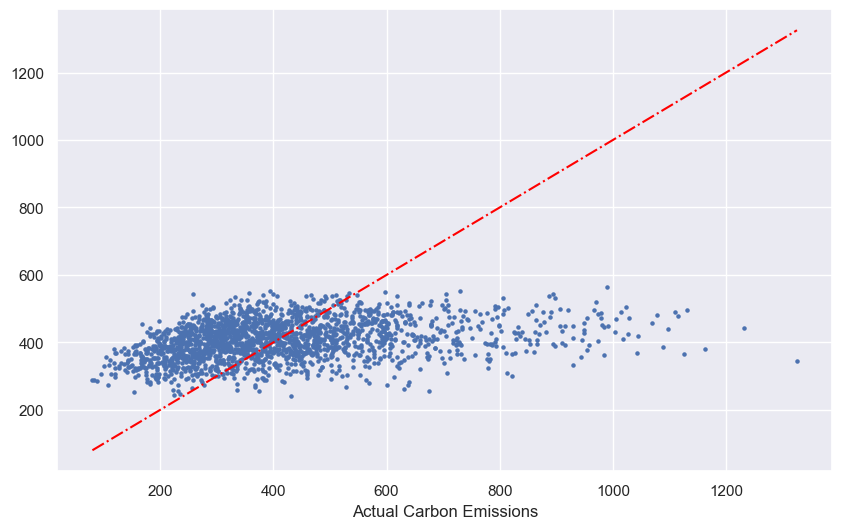

In [286]:
shopping_mae2 = mean_absolute_error(y_shopping_test, yPredShopping)
shopping_rmse2 = np.sqrt(mean_squared_error(y_shopping_test, yPredShopping))
shopping_r22 = r2_score(y_shopping_test,yPredShopping) 

print(f"MAE: {shopping_mae2:.4f}")
print(f"RMSE: {shopping_rmse2:.4f}")
print(f"R22: {shopping_r22:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_shopping_test, yPredShopping, s=5)
plt.plot([min(y_shopping_test), max(y_shopping_test)], [min(y_shopping_test), max(y_shopping_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')


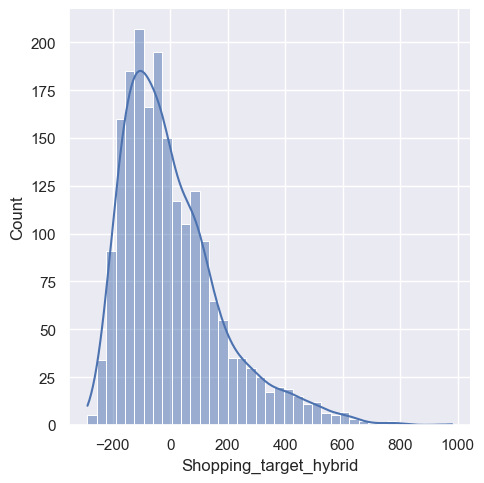

In [294]:
residuals_sh = y_shopping_test - yPredShopping
sns.displot(residuals_sh,kde=True)

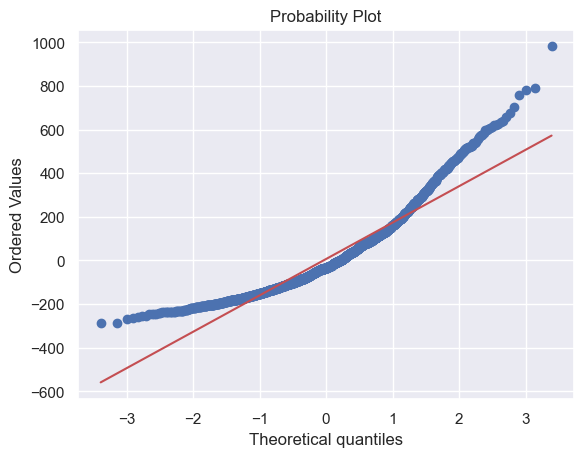

In [296]:
stats.probplot(residuals_sh, dist="norm", plot=pylab)
pylab.show()

## 7.5 Digital Usage

In [287]:
digital_cols = digital_usage_features + ['Digital_Usage_target_hybrid']
digital_usage_table = ds[digital_cols].dropna()
digital_usage_table.head(5)

,How Long Internet Daily Hour,Digital_Usage_target_hybrid
0,1,55.960234
1,5,47.308651
2,6,64.886866
3,7,26.854911
4,6,118.596688


In [89]:
digital_usage_cols = digital_usage_features + ['Digital_Usage_target_hybrid']
digital_usage_table = ds[digital_usage_cols].dropna()
digital_usage_train, digital_usage_test = train_test_split(digital_usage_table, test_size=0.2, random_state=42)

X_digital_usage_train = digital_usage_train.drop('Digital_Usage_target_hybrid', axis=1)  
y_digital_usage_train = digital_usage_train['Digital_Usage_target_hybrid']
X_digital_usage_test = digital_usage_test.drop('Digital_Usage_target_hybrid', axis=1)  
y_digital_usage_test = digital_usage_test['Digital_Usage_target_hybrid']

In [90]:
num_cols_digital_usage = [c for c in num_cols if c in digital_usage_features]
cat_cols_digital_usage = [c for c in cat_cols if c in digital_usage_features]

# Create preprocessor and model
digital_usage_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols_digital_usage),
        ('cat', categorical_transformer, cat_cols_digital_usage)
    ]
)

In [262]:
results_digital_usage = evaluate_model(X_digital_usage_train, y_digital_usage_train, X_digital_usage_test, y_digital_usage_test, digital_usage_preprocessor)
results_digital_usage

,Model,MAE,RMSE,R²
0,Linear Regression,19.389274,25.463066,0.002596
2,Ridge Regression,19.389278,25.463069,0.002596
6,Polynomial Regression (deg=2),19.389820,25.463596,0.002555
7,Polynomial Regression (deg=3),19.422077,25.483918,0.000962
8,Polynomial Regression (deg=4),19.427134,25.492571,0.000283
3,Lasso Regression,19.434120,25.505766,-0.000752
4,Gradient Boosting,19.459324,25.540973,-0.003516
1,Random Forest,19.469733,25.544664,-0.003806
5,XGBoost,19.463237,25.545037,-0.003836


In [288]:
bestModelDigitalUsage = Pipeline(steps=[
    ('preprocessor', digital_usage_preprocessor),
    ('regressor', LinearRegression())
])
bestModelDigitalUsage.fit(X_digital_usage_train, y_digital_usage_train)
yPredDigitalUsage = bestModelDigitalUsage.predict(X_digital_usage_test)

MAE: 19.3893
RMSE: 25.4631
R22: 0.0026


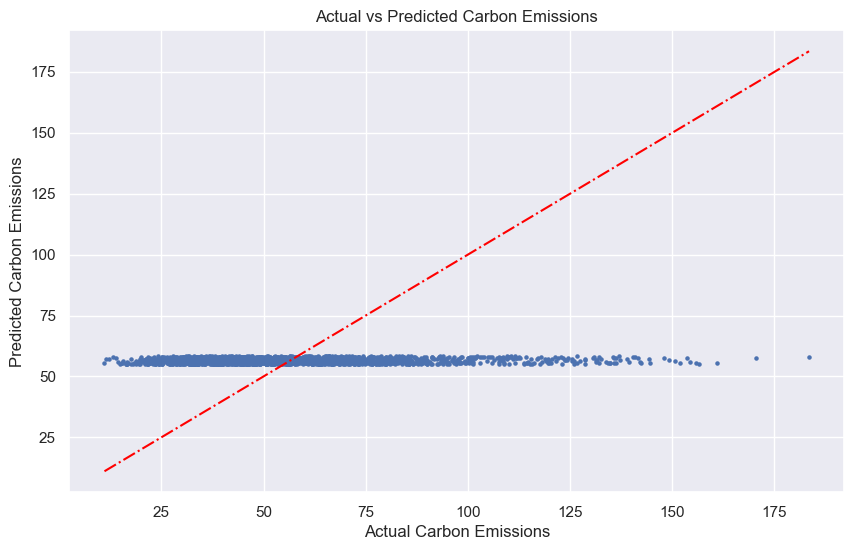

In [289]:
digital_usage_mae2 = mean_absolute_error(y_digital_usage_test, yPredDigitalUsage)
digital_usage_rmse2 = np.sqrt(mean_squared_error(y_digital_usage_test, yPredDigitalUsage))
digital_usage_r22 = r2_score(y_digital_usage_test,yPredDigitalUsage) 

print(f"MAE: {digital_usage_mae2:.4f}")
print(f"RMSE: {digital_usage_rmse2:.4f}")
print(f"R22: {digital_usage_r22:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_digital_usage_test, yPredDigitalUsage, s=5)
plt.plot([min(y_digital_usage_test), max(y_digital_usage_test)], [min(y_digital_usage_test), max(y_digital_usage_test)], color='red', linestyle='-.')
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
# plt.grid()
plt.show()


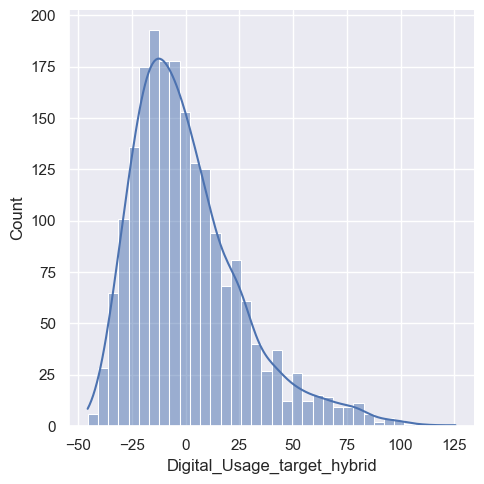

In [299]:
residuals_du = y_digital_usage_test - yPredDigitalUsage
sns.displot(residuals_du,kde=True)

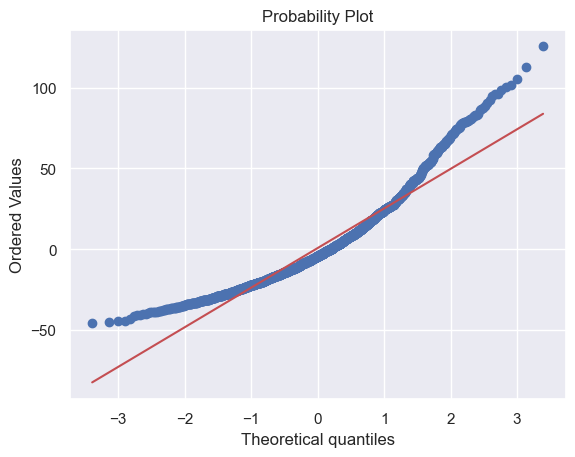

In [301]:
stats.probplot(residuals_du, dist="norm", plot=pylab)
pylab.show()

# 8. Model

In [353]:
import os
os.makedirs('models', exist_ok=True)

models_to_save = {
    'ModelTransport': bestModelTransport,
    'ModelHomeEnergy': bestModelHomeEnergy,
    'ModelFoodDiet': bestModelFoodDiet,
    'ModelShopping': bestModelShopping,
    'ModelDigitalUsage': bestModelDigitalUsage
}

for model_name, model in models_to_save.items():
    model_path = os.path.join('models', f'{model_name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

